In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
gold_data = pd.read_csv("/content/drive/MyDrive/Time Series/gold_data.csv")

In [ ]:
gold_data

,Date,Gold Price
0,31-08-2008,1190
1,30-08-2008,1188
2,29-08-2008,1186
3,30-09-2008,1350
4,29-09-2008,1317
...,...,...
5649,05-05-2024,7068
5650,04-05-2024,7068
5651,03-05-2024,7039
5652,02-05-2024,7069


In [ ]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'], format='%d-%m-%Y')

In [ ]:
gold_data['Year'] = gold_data['Date'].dt.year
gold_data['Month'] = gold_data['Date'].dt.month
gold_data['Day'] = gold_data['Date'].dt.day

In [ ]:
gold_data.rename(columns={'Gold Price' : 'Gold_Price'}, inplace=True)

In [ ]:
gold_data.dtypes

Date          datetime64[ns]
Gold_Price             int64
Year                   int32
Month                  int32
Day                    int32
dtype: object

In [ ]:
gold_data

,Date,Gold_Price,Year,Month,Day
0,2008-08-31,1190,2008,8,31
1,2008-08-30,1188,2008,8,30
2,2008-08-29,1186,2008,8,29
3,2008-09-30,1350,2008,9,30
4,2008-09-29,1317,2008,9,29
...,...,...,...,...,...
5649,2024-05-05,7068,2024,5,5
5650,2024-05-04,7068,2024,5,4
5651,2024-05-03,7039,2024,5,3
5652,2024-05-02,7069,2024,5,2


In [ ]:
df = gold_data[['Date', 'Gold_Price']].rename(columns={'Date': 'ds', 'Gold_Price':'y'})

In [ ]:
model = Prophet()

In [ ]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3qiljvda/rziy5wen.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3qiljvda/uhg90aap.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5893', 'data', 'file=/tmp/tmp3qiljvda/rziy5wen.json', 'init=/tmp/tmp3qiljvda/uhg90aap.json', 'output', 'file=/tmp/tmp3qiljvda/prophet_modelbmiwh5zq/prophet_model-20240606053628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:36:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:36:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=365)

In [ ]:
forecast = model.predict(future)

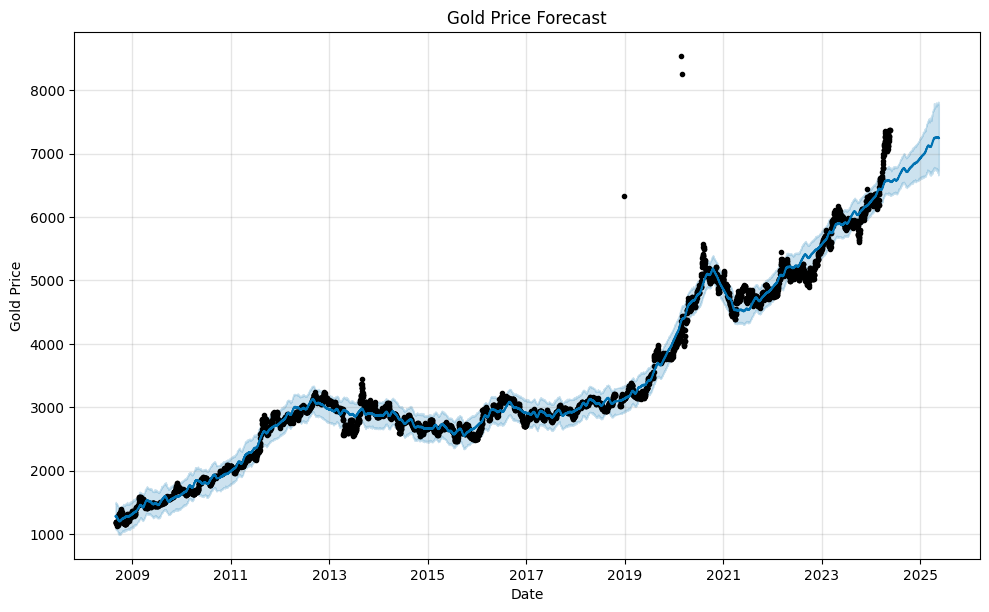

In [ ]:
import matplotlib.pyplot as plt

fig = model.plot(forecast)
plt.title("Gold Price Forecast")
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.show()

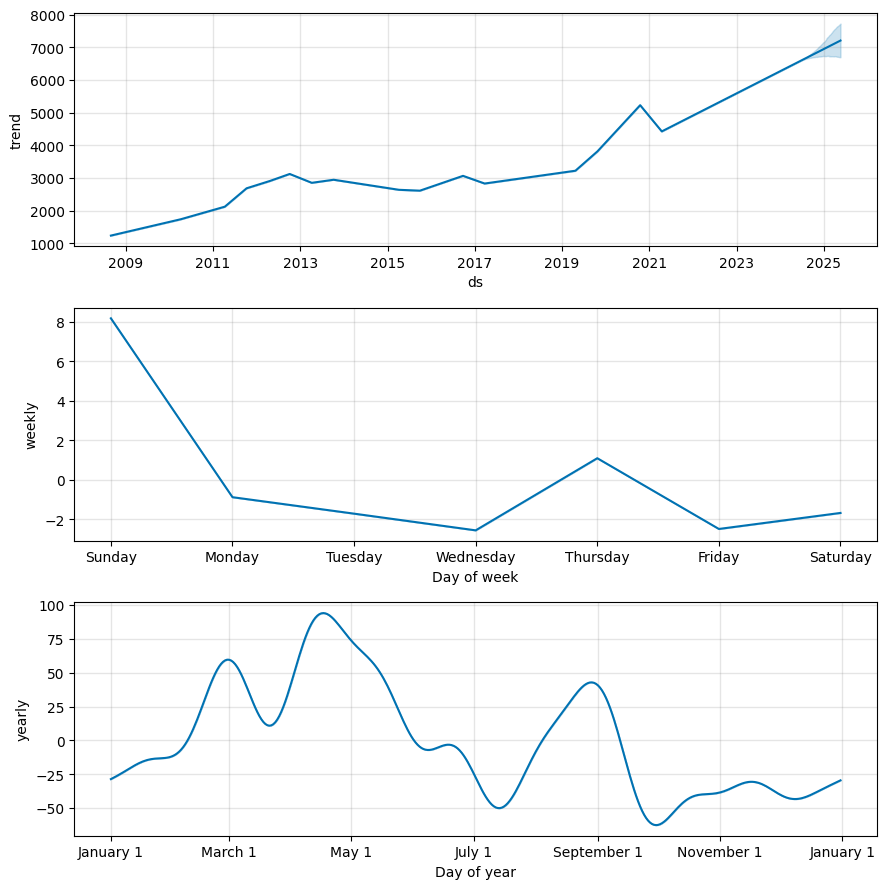

In [ ]:
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
specific_date = '2024-05-30'
future_specific_date = pd.DataFrame({'ds': [specific_date]})

forecast_specific_date = model.predict(future_specific_date)

# Print the forecast
print(forecast_specific_date[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

          ds         yhat  yhat_lower   yhat_upper
0 2024-05-30  6554.323792   6344.2788  6760.600576


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

forecast = forecast[['ds', 'yhat']].merge(df[['ds', 'y']], on='ds')

# Calculate error metrics
y_true = forecast['y']
y_pred = forecast['yhat']

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mape = (abs((y_true - y_pred) / y_true).mean()) * 100

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

MAE: 97.05077628881841
MSE: 25171.032122875276
RMSE: 158.65381219143546
MAPE: 2.938358232678425%


In [ ]:
from sklearn.metrics import r2_score

# Calculate R^2 score
r2 = r2_score(y_true, y_pred)
print(f'R^2: {r2}')


R^2: 0.9859663860729799


In [ ]:
threshold = 10

accuracy_within_threshold = ((abs(y_true - y_pred) <= threshold).sum() / len(y_true)) * 100
print(f'Accuracy within {threshold} units: {accuracy_within_threshold}%')

Accuracy within 10 units: 8.082773257870535%
